В качестве набора данных мы будем использовать набор данных по ирисам. В этом DataSet рассмотрим длину и ширину чашелистиков и лепестков.

Датасет состоит из следующих значений: 
1) sepal length (cm) - длина чашелистника 
2) sepal width (cm) - ширина чашелистника 
3) petal length (cm) - длина лепестка 
4) petal width (cm) - ширина лепестка 
5) target - целевой признак

ИМПОРТ БИБЛИОТЕК

Импортируем библиотеки с помощью команды import. Загрузим файлы датасета в помощью библиотеки Pandas.

In [1]:
#Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
df = pd.read_csv('heart.csv', sep=',')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Количество строк и столбцов хранится в датасете

In [4]:
df.shape

(1025, 14)

Краткая информация обо всех параметрах датасета

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Поиск и удаление дубликатов

In [6]:
df = df.drop_duplicates()
df.shape

(302, 14)

Проверка на наличие пропусков

In [10]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,False,False,False,False,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

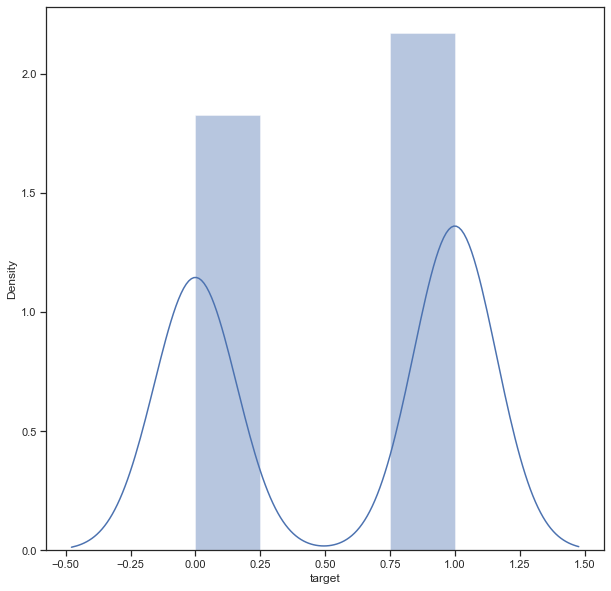

In [12]:
# Гистограмма позволяет оценить плотность вероятности распределения данных
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['target'])

In [13]:
# Информация о коррелляции признаков
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [14]:
# Информация о коррелляции признаков разными методами
df.corr(method='kendall')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.079703,-0.067661,0.204251,0.130302,0.093107,-0.105807,-0.276845,0.071705,0.189769,-0.144039,0.283731,0.068384,-0.194922
sex,-0.079703,1.000000,-0.060473,-0.045589,-0.121874,0.046022,-0.050263,-0.035724,0.143460,0.089040,-0.026689,0.108948,0.246011,-0.283609
cp,-0.067661,-0.060473,1.000000,0.025628,-0.066319,0.085289,0.058242,0.244045,-0.389819,-0.122676,0.143360,-0.196973,-0.187790,0.429303
trestbps,0.204251,-0.045589,0.025628,1.000000,0.088983,0.128567,-0.106915,-0.029450,0.045496,0.110984,-0.072175,0.068261,0.049909,-0.103651
chol,0.130302,-0.121874,-0.066319,0.088983,1.000000,0.013339,-0.129442,-0.027159,0.072525,0.031119,-0.005904,0.096991,0.064068,-0.095948
fbs,0.093107,0.046022,0.085289,0.128567,0.013339,1.000000,-0.079834,-0.010362,0.024729,0.022914,-0.043321,0.129849,-0.007354,-0.026826
restecg,-0.105807,-0.050263,0.058242,-0.106915,-0.129442,-0.079834,1.000000,0.069650,-0.074952,-0.063404,0.107313,-0.097962,-0.008812,0.145301
thalach,-0.276845,-0.035724,0.244045,-0.029450,-0.027159,-0.010362,0.069650,1.000000,-0.328865,-0.304641,0.347881,-0.206265,-0.128545,0.350952
exang,0.071705,0.143460,-0.389819,0.045496,0.072525,0.024729,-0.074952,-0.328865,1.000000,0.253496,-0.265326,0.157689,0.239575,-0.435601
oldpeak,0.189769,0.089040,-0.122676,0.110984,0.031119,0.022914,-0.063404,-0.304641,0.253496,1.000000,-0.506870,0.190765,0.212159,-0.359998


In [15]:
df.corr(method='spearman')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.096028,-0.082679,0.289705,0.188903,0.112177,-0.128480,-0.393453,0.086392,0.263625,-0.179514,0.354919,0.084358,-0.234845
sex,-0.096028,1.000000,-0.064739,-0.054310,-0.148622,0.046022,-0.050582,-0.043401,0.143460,0.103789,-0.027434,0.115811,0.252738,-0.283609
cp,-0.082679,-0.064739,1.000000,0.033328,-0.087005,0.091306,0.062848,0.321549,-0.417321,-0.158693,0.156819,-0.224656,-0.206536,0.459589
trestbps,0.289705,-0.054310,0.033328,1.000000,0.130210,0.153161,-0.127945,-0.042699,0.054199,0.156807,-0.088727,0.087322,0.060770,-0.123478
chol,0.188903,-0.148622,-0.087005,0.130210,1.000000,0.016267,-0.157972,-0.040367,0.088442,0.039565,-0.007404,0.123201,0.080810,-0.117006
fbs,0.112177,0.046022,0.091306,0.153161,0.016267,1.000000,-0.080340,-0.012588,0.024729,0.026710,-0.044529,0.138029,-0.007555,-0.026826
restecg,-0.128480,-0.050582,0.062848,-0.127945,-0.157972,-0.080340,1.000000,0.084426,-0.075427,-0.074073,0.110853,-0.104653,-0.009045,0.146223
thalach,-0.393453,-0.043401,0.321549,-0.042699,-0.040367,-0.012588,0.084426,1.000000,-0.399534,-0.430495,0.434711,-0.267546,-0.158526,0.426368
exang,0.086392,0.143460,-0.417321,0.054199,0.088442,0.024729,-0.075427,-0.399534,1.000000,0.295487,-0.272726,0.167622,0.246126,-0.435601
oldpeak,0.263625,0.103789,-0.158693,0.156807,0.039565,0.026710,-0.074073,-0.430495,0.295487,1.000000,-0.593147,0.234546,0.253358,-0.419631


<AxesSubplot:>

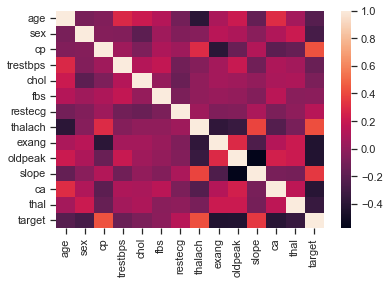

In [16]:
#Для визуализации корреляционной матрицы будем использовать "тепловую карту", 
#которая показывает степень корреляции различными цветами.
sns.heatmap(df.corr())

<AxesSubplot:>

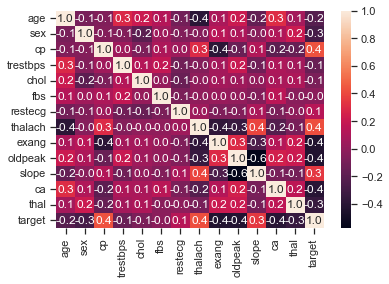

In [17]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.1f')

C:\Users\Asus\AppData\Local\Temp/ipykernel_40732/1849047595.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

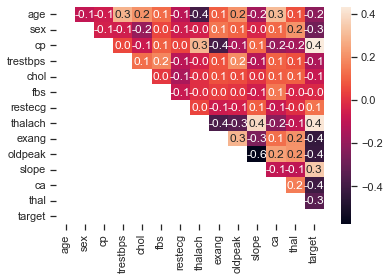

In [18]:
# Треугольный вариант матрицы
mask = np.zeros_like(df.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.1f')

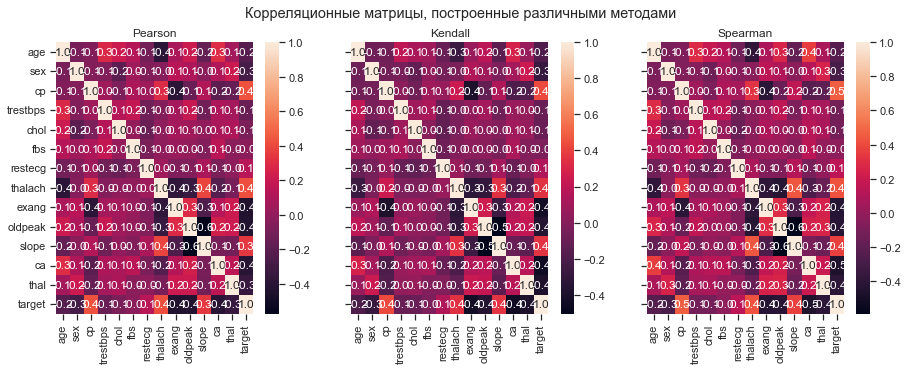

In [19]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')